## Importing necessary libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing dataset from https://www.kaggle.com/yogidsba/predict-used-car-prices-linearregression/data

In [3]:
df = pd.read_csv('used_cars_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [5]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [7]:
# removing duplicate index.

In [8]:
df=df.iloc[:,1:]
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [9]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,2013.365366,5.869906e+04,5.279722,9.479468
std,3.254421,8.442772e+04,0.811660,11.187917
min,1996.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.341600e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [10]:
df.shape

(7253, 13)

In [11]:
print(df['Location'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner_Type'].unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


## Feature Engineering

In [12]:
# finding null values, droping them and reseting index.

In [13]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [14]:
print("Shape of df Before dropping any Row: ",df.shape)
df = df[df['Mileage'].notna()]
print("Shape of df After dropping Rows with NULL values in Mileage: ",df.shape)
df = df[df['Engine'].notna()]
print("Shape of df After dropping Rows with NULL values in Engine : ",df.shape)
df = df[df['Power'].notna()]
print("Shape of df After dropping Rows with NULL values in Power  : ",df.shape)
df = df[df['Seats'].notna()]
print("Shape of df After dropping Rows with NULL values in Seats  : ",df.shape)
df = df[df['Price'].notna()]
print("Shape of df After dropping Rows with NULL values in Seats  : ",df.shape)

Shape of df Before dropping any Row:  (7253, 13)
Shape of df After dropping Rows with NULL values in Mileage:  (7251, 13)
Shape of df After dropping Rows with NULL values in Engine :  (7205, 13)
Shape of df After dropping Rows with NULL values in Power  :  (7205, 13)
Shape of df After dropping Rows with NULL values in Seats  :  (7198, 13)
Shape of df After dropping Rows with NULL values in Seats  :  (5975, 13)


In [15]:
df = df.reset_index(drop=True)

In [16]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [17]:
# getting company name from name column and converting 'Mileage', 'Engine' and 'Power' column into float datatype.

In [18]:
for i in range(df.shape[0]):
    df.at[i, 'Company'] = df['Name'][i].split()[0]
    df.at[i, 'Mileage(kmpl)'] = df['Mileage'][i].split()[0]
    df.at[i, 'Engine(CC)'] = df['Engine'][i].split()[0]
    df.at[i, 'Power(bhp)'] = df['Power'][i].split()[0]

In [19]:
df['Mileage(kmpl)'] = df['Mileage(kmpl)'].astype(float)
df['Engine(CC)'] = df['Engine(CC)'].astype(float)

In [20]:
x = 'n'
count = 0
position = []
for i in range(df.shape[0]):
    if df['Power(bhp)'][i]=='null':
        x = 'Y'
        count = count + 1
        position.append(i)
print(x)
print(count)
print(position)

Y
103
[76, 79, 89, 120, 143, 225, 242, 259, 304, 305, 383, 421, 425, 440, 469, 572, 628, 644, 645, 735, 744, 824, 910, 921, 929, 1063, 1138, 1148, 1266, 1313, 1338, 1380, 1411, 1546, 1569, 1640, 1663, 1848, 1989, 2043, 2118, 2152, 2250, 2254, 2292, 2328, 2377, 2425, 2434, 2481, 2485, 2511, 2561, 2579, 2616, 2621, 2868, 3010, 3038, 3081, 3166, 3224, 3266, 3414, 3491, 3506, 3562, 3601, 3611, 3618, 3642, 3706, 3868, 3900, 3969, 4046, 4049, 4318, 4321, 4593, 4672, 4676, 4706, 4792, 4848, 4862, 4914, 5024, 5078, 5186, 5383, 5395, 5415, 5486, 5490, 5604, 5712, 5716, 5818, 5830, 5881, 5899, 5941]


In [21]:
df = df.drop(df.index[position])
df = df.reset_index(drop=True)

In [22]:
df.shape

(5872, 17)

In [23]:
df['Power(bhp)'] = df['Power(bhp)'].astype(float)

In [24]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company,Mileage(kmpl),Engine(CC),Power(bhp)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,15.20,1968.0,140.80


In [25]:
# converting 'New_Price' column into float datatype

In [26]:
for i in range(df.shape[0]):
    if pd.isnull(df.loc[i,'New_Price']) == False:
        df.at[i,'New_car_Price'] = df['New_Price'][i].split()[0]

In [27]:
df['New_car_Price'] = df['New_car_Price'].astype(float)

In [28]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company,Mileage(kmpl),Engine(CC),Power(bhp),New_car_Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,26.60,998.0,58.16,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,19.67,1582.0,126.20,NaN
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,18.20,1199.0,88.70,8.61
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,20.77,1248.0,88.76,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,15.20,1968.0,140.80,NaN


In [29]:
# deleting useless features

In [30]:
df.drop(["Name"],axis=1,inplace=True)
df.drop(["Mileage"],axis=1,inplace=True)
df.drop(["Engine"],axis=1,inplace=True)
df.drop(["Power"],axis=1,inplace=True)
df.drop(["New_Price"],axis=1,inplace=True)

In [31]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(kmpl),Engine(CC),Power(bhp),New_car_Price
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,26.60,998.0,58.16,NaN
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,18.20,1199.0,88.70,8.61
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,15.20,1968.0,140.80,NaN


## Data Visualization

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5872 non-null   object 
 1   Year               5872 non-null   int64  
 2   Kilometers_Driven  5872 non-null   int64  
 3   Fuel_Type          5872 non-null   object 
 4   Transmission       5872 non-null   object 
 5   Owner_Type         5872 non-null   object 
 6   Seats              5872 non-null   float64
 7   Price              5872 non-null   float64
 8   Company            5872 non-null   object 
 9   Mileage(kmpl)      5872 non-null   float64
 10  Engine(CC)         5872 non-null   float64
 11  Power(bhp)         5872 non-null   float64
 12  New_car_Price      823 non-null    float64
dtypes: float64(6), int64(2), object(5)
memory usage: 596.5+ KB


In [33]:
# plotting histogram of our target variable i.e 'Price' so that we can get glance on distribution of Car Price.

In [34]:
df['Price'].describe()

count    5872.000000
mean        9.603919
std        11.249453
min         0.440000
25%         3.517500
50%         5.750000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

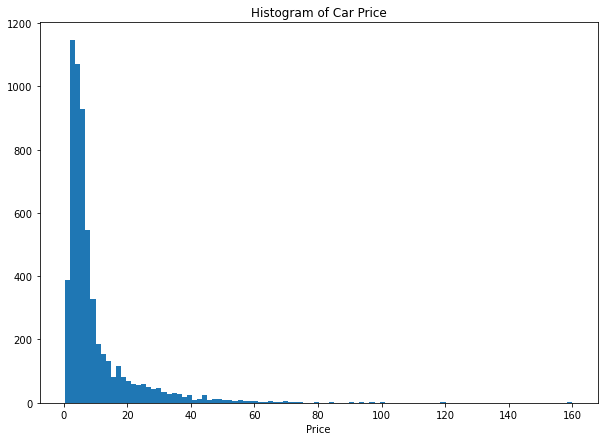

In [35]:
fig=plt.figure(figsize=(10,7))
plt.hist(df['Price'],bins=100)
plt.title("Histogram of Car Price")
plt.xlabel("Price")
plt.savefig('Hist_Car_Price.png')

In [36]:
# Plotting box plot of Fuel_type vs Price to get insight about which type would cost more than other.

In [37]:
df['Fuel_Type'].describe()

count       5872
unique         4
top       Diesel
freq        3152
Name: Fuel_Type, dtype: object

<Figure size 720x504 with 0 Axes>

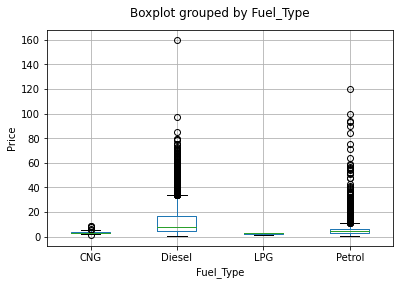

In [38]:
fig=plt.figure(figsize=(10,7))
df1=pd.concat([df['Price'], df['Fuel_Type']],axis=1)
df1.boxplot(by="Fuel_Type", column=['Price']).set_title("")
plt.ylabel('Price')
plt.savefig('boxplot_fueltype.png')

In [39]:
# Plotting box plot of Owner_type vs Price to know relation between type of owner(i.e first owner, second owner, etc) and Car Price.

In [40]:
df['Owner_Type'].describe()

count      5872
unique        4
top       First
freq       4839
Name: Owner_Type, dtype: object

<Figure size 720x504 with 0 Axes>

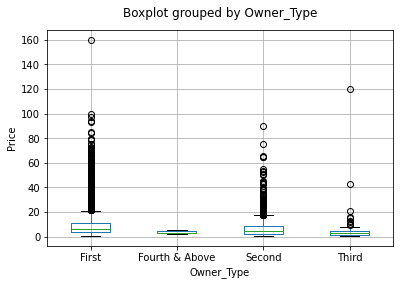

In [41]:
fig=plt.figure(figsize=(10,7))
df1=pd.concat([df['Price'], df['Owner_Type']],axis=1)
df1.boxplot(by="Owner_Type", column=['Price']).set_title("")
plt.ylabel('Price')
plt.savefig('boxplot_ownertype.png')

In [42]:
# Plotting bar graph of company vs count of cars. For example Maruti is most comman brand followed by Hyundai.

In [43]:
df['Company'].describe()

count       5872
unique        30
top       Maruti
freq        1175
Name: Company, dtype: object

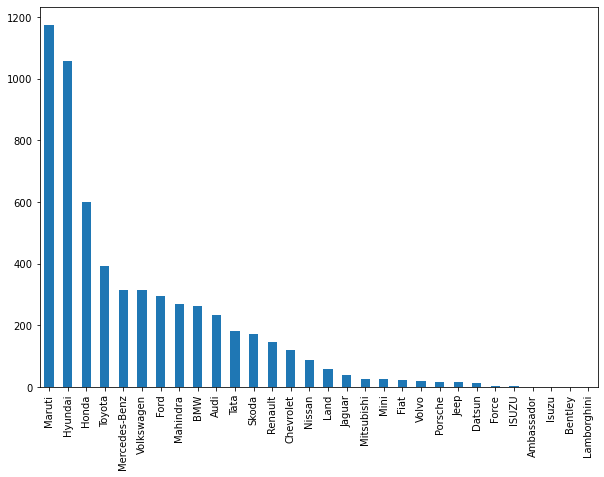

In [44]:
fig=plt.figure(figsize=(10,7))
df['Company'].value_counts().plot(kind='bar')
plt.savefig('carcnts_by_comp.png')

## working with categorical data

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5872 non-null   object 
 1   Year               5872 non-null   int64  
 2   Kilometers_Driven  5872 non-null   int64  
 3   Fuel_Type          5872 non-null   object 
 4   Transmission       5872 non-null   object 
 5   Owner_Type         5872 non-null   object 
 6   Seats              5872 non-null   float64
 7   Price              5872 non-null   float64
 8   Company            5872 non-null   object 
 9   Mileage(kmpl)      5872 non-null   float64
 10  Engine(CC)         5872 non-null   float64
 11  Power(bhp)         5872 non-null   float64
 12  New_car_Price      823 non-null    float64
dtypes: float64(6), int64(2), object(5)
memory usage: 596.5+ KB


In [46]:
# As for now there are five categorical features.
#1.Location
#2.Fuel_Type
#3.Transmission
#4.Owner_Type
#5.Company

In [47]:
# Dividing these each features into categories and generating new columns.

In [48]:
df=pd.get_dummies(df, columns=['Location', 'Fuel_Type'], drop_first=False)

In [49]:
df.shape

(5872, 26)

In [50]:
df=pd.get_dummies(df, columns=['Transmission'], drop_first=True)

In [51]:
df.shape

(5872, 26)

In [52]:
df

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Company,Mileage(kmpl),Engine(CC),Power(bhp),New_car_Price,...,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,First,5.0,1.75,Maruti,26.60,998.0,58.16,NaN,...,0,0,0,1,0,1,0,0,0,1
1,2015,41000,First,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN,...,0,0,0,0,1,0,1,0,0,1
2,2011,46000,First,5.0,4.50,Honda,18.20,1199.0,88.70,8.61,...,0,0,0,0,0,0,0,0,1,1
3,2012,87000,First,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN,...,0,0,0,0,0,0,1,0,0,1
4,2013,40670,Second,5.0,17.74,Audi,15.20,1968.0,140.80,NaN,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,2014,27365,First,5.0,4.75,Maruti,28.40,1248.0,74.00,7.88,...,0,0,0,0,0,0,1,0,0,1
5868,2015,100000,First,5.0,4.00,Hyundai,24.40,1120.0,71.00,NaN,...,1,0,0,0,0,0,1,0,0,1
5869,2012,55000,Second,8.0,2.90,Mahindra,14.00,2498.0,112.00,NaN,...,1,0,0,0,0,0,1,0,0,1
5870,2013,46000,First,5.0,2.65,Maruti,18.90,998.0,67.10,NaN,...,0,0,1,0,0,0,0,0,1,1


In [53]:
df.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
df.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Company,Mileage(kmpl),Engine(CC),Power(bhp),New_car_Price,...,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,1,5.0,1.75,Maruti,26.60,998.0,58.16,NaN,...,0,0,0,1,0,1,0,0,0,1
1,2015,41000,1,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN,...,0,0,0,0,1,0,1,0,0,1
2,2011,46000,1,5.0,4.50,Honda,18.20,1199.0,88.70,8.61,...,0,0,0,0,0,0,0,0,1,1
3,2012,87000,1,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN,...,0,0,0,0,0,0,1,0,0,1
4,2013,40670,2,5.0,17.74,Audi,15.20,1968.0,140.80,NaN,...,0,0,0,0,0,0,1,0,0,0


## Feature Selection

In [54]:
# Selecting final features that will be used for model building and droping all other useless feature.

In [55]:
df.drop(["Company"],axis=1,inplace=True)

In [56]:
df.drop(['New_car_Price'],axis=1, inplace=True)

In [57]:
df

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Mileage(kmpl),Engine(CC),Power(bhp),Location_Ahmedabad,Location_Bangalore,...,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,1,5.0,1.75,26.60,998.0,58.16,0,0,...,0,0,0,1,0,1,0,0,0,1
1,2015,41000,1,5.0,12.50,19.67,1582.0,126.20,0,0,...,0,0,0,0,1,0,1,0,0,1
2,2011,46000,1,5.0,4.50,18.20,1199.0,88.70,0,0,...,0,0,0,0,0,0,0,0,1,1
3,2012,87000,1,7.0,6.00,20.77,1248.0,88.76,0,0,...,0,0,0,0,0,0,1,0,0,1
4,2013,40670,2,5.0,17.74,15.20,1968.0,140.80,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,2014,27365,1,5.0,4.75,28.40,1248.0,74.00,0,0,...,0,0,0,0,0,0,1,0,0,1
5868,2015,100000,1,5.0,4.00,24.40,1120.0,71.00,0,0,...,1,0,0,0,0,0,1,0,0,1
5869,2012,55000,2,8.0,2.90,14.00,2498.0,112.00,0,0,...,1,0,0,0,0,0,1,0,0,1
5870,2013,46000,1,5.0,2.65,18.90,998.0,67.10,0,0,...,0,0,1,0,0,0,0,0,1,1


In [58]:
df.columns

Index(['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats', 'Price',
       'Mileage(kmpl)', 'Engine(CC)', 'Power(bhp)', 'Location_Ahmedabad',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual'],
      dtype='object')

In [59]:
y=df['Price']

In [60]:
y.shape

(5872,)

In [61]:
df.drop(['Price'],axis=1, inplace=True)

In [62]:
x=df

In [63]:
x.shape

(5872, 23)

In [64]:
x

,Year,Kilometers_Driven,Owner_Type,Seats,Mileage(kmpl),Engine(CC),Power(bhp),Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,1,5.0,26.60,998.0,58.16,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,2015,41000,1,5.0,19.67,1582.0,126.20,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,2011,46000,1,5.0,18.20,1199.0,88.70,0,0,1,...,0,0,0,0,0,0,0,0,1,1
3,2012,87000,1,7.0,20.77,1248.0,88.76,0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,2013,40670,2,5.0,15.20,1968.0,140.80,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,2014,27365,1,5.0,28.40,1248.0,74.00,0,0,0,...,0,0,0,0,0,0,1,0,0,1
5868,2015,100000,1,5.0,24.40,1120.0,71.00,0,0,0,...,1,0,0,0,0,0,1,0,0,1
5869,2012,55000,2,8.0,14.00,2498.0,112.00,0,0,0,...,1,0,0,0,0,0,1,0,0,1
5870,2013,46000,1,5.0,18.90,998.0,67.10,0,0,0,...,0,0,1,0,0,0,0,0,1,1


## model building

In [65]:
# Building model using sklearn library.

In [66]:
# First splitting data to train and test into 80:20 ratio for the model. 

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [78]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4697, 23)
(1175, 23)
(4697,)
(1175,)


In [68]:
# Applying Linear Regression algorithm using sklearn library.

In [69]:
from sklearn.linear_model import LinearRegression
multi_model = LinearRegression()
multi_model.fit(x_train, y_train)

LinearRegression()

In [70]:
# Predicting y_test by giving x_test as an input to the model

In [75]:
y_pred=multi_model.predict(x_test)

In [80]:
y_pred

array([ 8.37728023, 11.44569692,  9.41778251, ...,  1.99281629,
       13.57967892,  7.1036287 ])

In [72]:
# Model accuracy for x_train,y_train and x_test,y_test respectively. 

In [73]:
multi_model.score(x_train,y_train)

0.7015609092235184

In [74]:
multi_model.score(x_test,y_test)

0.7270531191250961